In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 224
img_width = 224

In [3]:
data_dir = 'data/dataset/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 31476 files belonging to 126 classes.
Using 22034 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 31476 files belonging to 126 classes.
Using 9442 files for validation.


In [5]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

In [6]:
class_names = train_ds.class_names


In [7]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = len(class_names)
IMG_SHAPE = (img_width, img_height, 3)

## EfficientNet



In [10]:

basemodel = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
basemodel.trainable = False
basemodel.summary()

52617216/52606240 [==============================] - 28s 1us/step
Model: "efficientnetv2-b3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv

                                                                                                  
 block2c_project_conv (Conv2D)  (None, 56, 56, 40)   6400        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 56, 56, 40)  160         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_add (Add)              (None, 56, 56, 40)   0           ['block2c_project_bn[0][0]',     
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block3a_e

                                                                                                  
 block4a_se_excite (Multiply)   (None, 14, 14, 224)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 14, 14, 112)  25088       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 14, 14, 448)  50176       ['block4a_project_bn[0][0]']     
          

 block4d_expand_conv (Conv2D)   (None, 14, 14, 448)  50176       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 14, 14, 448)  1792       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 14, 14, 448)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv2 (DepthwiseConv  (None, 14, 14, 448)  4032       ['block4d_expand_activation[0][0]
 2D)                                                             ']                               
          

 2D)                                                             ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 14, 14, 672)  2688       ['block5a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 672)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 672)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 34)     27778       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 816)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 136)  110976      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_p

                                                                                                  
 block5e_project_bn (BatchNorma  (None, 14, 14, 136)  544        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_add (Add)              (None, 14, 14, 136)  0           ['block5e_project_bn[0][0]',     
                                                                  'block5d_add[0][0]']            
                                                                                                  
 block5f_expand_conv (Conv2D)   (None, 14, 14, 816)  110976      ['block5e_add[0][0]']            
                                                                                                  
 block5f_expand_bn (BatchNormal  (None, 14, 14, 816)  3264       ['block5f_expand_conv[0][0]']    
 ization) 

 block6a_expand_bn (BatchNormal  (None, 14, 14, 816)  3264       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 14, 14, 816)  0          ['block6a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6a_dwconv2 (DepthwiseConv  (None, 7, 7, 816)   7344        ['block6a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 7, 7, 816)   3264        ['block6a_dwconv2[0][0]']        
 )        

 block6c_activation (Activation  (None, 7, 7, 1392)  0           ['block6c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 1392)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6c_se_reshape[0][0]']     
                                                                                                  
 block6c_s

                                                                                                  
 block6e_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6e_se_reduce[0][0]']      
                                                                                                  
 block6e_se_excite (Multiply)   (None, 7, 7, 1392)   0           ['block6e_activation[0][0]',     
                                                                  'block6e_se_expand[0][0]']      
                                                                                                  
 block6e_project_conv (Conv2D)  (None, 7, 7, 232)    322944      ['block6e_se_excite[0][0]']      
                                                                                                  
 block6e_project_bn (BatchNorma  (None, 7, 7, 232)   928         ['block6e_project_conv[0][0]']   
 lization)                                                                                        
          

 lization)                                                                                        
                                                                                                  
 block6g_add (Add)              (None, 7, 7, 232)    0           ['block6g_project_bn[0][0]',     
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1392)   322944      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1392)  5568        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_e

                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 1392)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv2 (DepthwiseConv  (None, 7, 7, 1392)  12528       ['block6j_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 1392)  5568        ['block6j_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6j_a

                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 1392)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_se_squeeze (GlobalAver  (None, 1392)        0           ['block6l_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6l_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6l_se_squeeze[0][0]']     
                                                                                                  
 block6l_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6l_se_reshape[0][0]']     
          

In [11]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = basemodel(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1536)


In [12]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

In [13]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = basemodel(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs,name = 'efficientnet_model')
model.summary()

Model: "efficientnet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Function  (None, 7, 7, 1536)       12930622  
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 126)               193662    
                                                                 
Total params: 13,124,284
Trainable params: 193,6

In [14]:
lr = 0.001
b1 = 0.9
b2 = 0.999 
ep = 1e-07
EPOCHS = 8

In [15]:
checkpoint_filepath = 'models/checkpoints/efficientnet/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr, beta_1=b1,beta_2=b2, epsilon=ep, decay=0.0),
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [16]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
      callbacks=[model_checkpoint_callback],
  epochs=EPOCHS
)

Epoch 1/8
689/689 [==============================] - 102s 138ms/step - loss: 1.8174 - accuracy: 0.6212 - val_loss: 0.8742 - val_accuracy: 0.8329
Epoch 2/8
689/689 [==============================] - 131s 190ms/step - loss: 0.6488 - accuracy: 0.8772 - val_loss: 0.4962 - val_accuracy: 0.9166
Epoch 3/8
689/689 [==============================] - 141s 205ms/step - loss: 0.4024 - accuracy: 0.9282 - val_loss: 0.3487 - val_accuracy: 0.9420
Epoch 4/8
689/689 [==============================] - 138s 201ms/step - loss: 0.2851 - accuracy: 0.9521 - val_loss: 0.2674 - val_accuracy: 0.9563
Epoch 5/8
689/689 [==============================] - 145s 210ms/step - loss: 0.2173 - accuracy: 0.9649 - val_loss: 0.2183 - val_accuracy: 0.9623
Epoch 6/8
689/689 [==============================] - 126s 182ms/step - loss: 0.1723 - accuracy: 0.9732 - val_loss: 0.1826 - val_accuracy: 0.9666
Epoch 7/8
689/689 [==============================] - 145s 210ms/step - loss: 0.1425 - accuracy: 0.9797 - val_loss: 0.1604 - val_ac

In [17]:
loss_p, accuracy = model.evaluate(test_dataset)
accuracy = accuracy * 100
print(f"Loss: {loss_p:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

59/59 [==============================] - 6s 101ms/step - loss: 0.1607 - accuracy: 0.9640
Loss: 0.16%
Accuracy: 96.40%


In [18]:
import datetime
today = datetime.datetime.now()
folder_name = f'{today.hour}-{today.minute}_{today.day:02d}-{today.month}-{today.year}'
path = os.path.join('results','model_summary','efficientnet',folder_name)
if not os.path.exists(path):
    os.makedirs(path)
model_folder = path

In [19]:
import pickle
pickle.dump(history.history, open(model_folder+'\history.pickle', 'wb'))

In [20]:
# save as directory
model.save(model_folder+'\model')

INFO:tensorflow:Assets written to: results\model_summary\efficientnet\21-42_26-3-2022\model\assets


In [21]:
# save weights
model.save_weights(model_folder+f'/model_{num_classes}-acc{int(accuracy)}.h5')

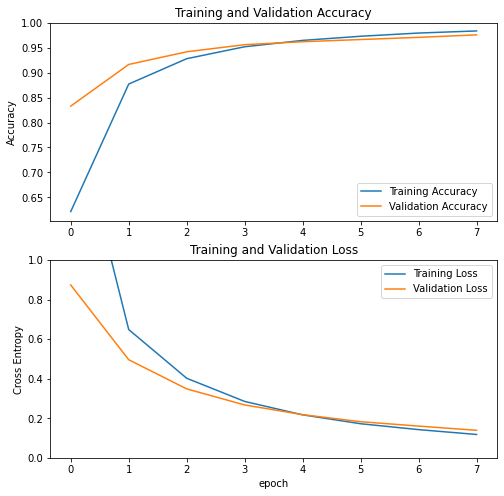

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig(model_folder+'\combined.png')
plt.show()

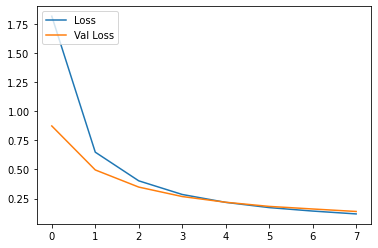

In [23]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Val Loss")
plt.legend(loc="upper left")
plt.savefig(model_folder+'\loss.png')
plt.show()

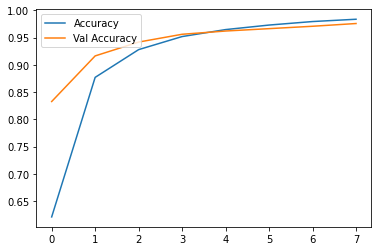

In [24]:
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history['val_accuracy'],label="Val Accuracy")
plt.legend(loc="upper left")
plt.savefig(model_folder+'\\accuracy.png')
plt.show()

### Fine tuning

In [25]:
# backup 
og_model = model

In [26]:
print("Number of layers in the base model: ", len(basemodel.layers))

Number of layers in the base model:  383


In [30]:
basemodel.trainable = True 

In [31]:
# Fine-tune from this layer onwards
fine_tune_at = 283

# Freeze all the layers before the `fine_tune_at` layer
for layer in basemodel.layers[:fine_tune_at]:
  layer.trainable =  False

In [32]:
lr = 1e-05
b1 = 0.9
b2 = 0.999 
ep = 1e-07

In [33]:

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr, beta_1=b1,beta_2=b2, epsilon=ep, decay=0.0),
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [34]:
model.summary()

Model: "efficientnet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Function  (None, 7, 7, 1536)       12930622  
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 126)               193662    
                                                                 
Total params: 13,124,284
Trainable params: 6,021

In [35]:
fine_tune_epochs = 4
total_epochs =  EPOCHS + fine_tune_epochs
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                        callbacks=[model_checkpoint_callback],
                         validation_data=val_ds)

Epoch 8/12
689/689 [==============================] - 175s 242ms/step - loss: 0.0588 - accuracy: 0.9894 - val_loss: 0.0765 - val_accuracy: 0.9808
Epoch 9/12
689/689 [==============================] - 150s 217ms/step - loss: 0.0373 - accuracy: 0.9921 - val_loss: 0.0659 - val_accuracy: 0.9828
Epoch 10/12
689/689 [==============================] - 158s 230ms/step - loss: 0.0269 - accuracy: 0.9944 - val_loss: 0.0582 - val_accuracy: 0.9849
Epoch 11/12
689/689 [==============================] - 154s 223ms/step - loss: 0.0187 - accuracy: 0.9969 - val_loss: 0.0540 - val_accuracy: 0.9848
Epoch 12/12
689/689 [==============================] - 168s 244ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.0530 - val_accuracy: 0.9845


In [ ]:
model.load_weights(checkpoint_filepath)

In [36]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

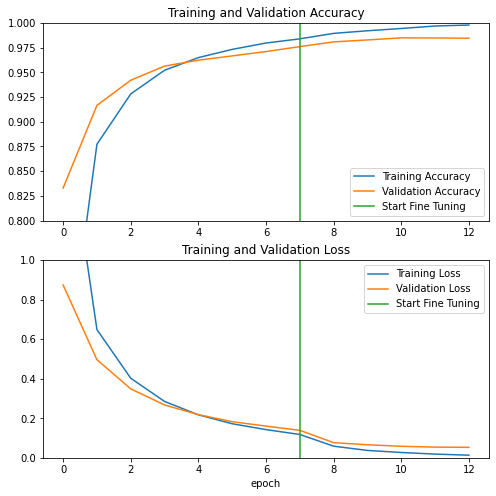

In [37]:

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([EPOCHS-1,EPOCHS-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([EPOCHS-1,EPOCHS-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig(model_folder+'\combined_finetuned.png')
plt.show()

In [38]:
loss_finetuned, accuracy_finetuned = model.evaluate(test_dataset)
accuracy_finetuned = accuracy_finetuned * 100
print('Test accuracy :', accuracy_finetuned)

59/59 [==============================] - 6s 99ms/step - loss: 0.0666 - accuracy: 0.9799
Test accuracy : 97.98728823661804


In [39]:
def predict_word(num):
    pred = ''
    ch = class_names[num]
    lis = ch.split(' ')
    char_list = [chr(int(i)) for i in lis]
    pred += ''.join(char_list)
    return pred

In [40]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

In [41]:
predictions = predictions.argmax(axis=-1)

In [42]:
from matplotlib.font_manager import FontProperties
from pathlib import Path
# point to the font location with an absolute path
nirm = Path('c:/Windows/Fonts/kartika.ttf')

# configure the Hindi font
mal_font = FontProperties(fname=nirm)

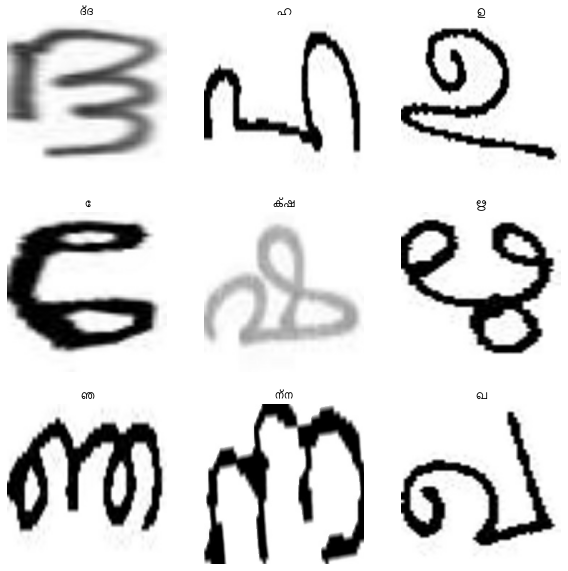

In [43]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  pred_word = predict_word(predictions[i])
  plt.title(pred_word,fontproperties=mal_font)
  plt.savefig(model_folder+'\prediction.jpg')
  plt.axis("off")

In [44]:
# save weights
model.save_weights(model_folder+f'/model_{num_classes}_efficientnet_finetuned_{today.hour}-{today.minute}_{today.day:02d}-{today.month}-{today.year}-acc{int(accuracy)}.h5')

In [45]:
# save as directory
model.save(model_folder+f'\model_finetuned')

INFO:tensorflow:Assets written to: results\model_summary\efficientnet\21-42_26-3-2022\model_finetuned\assets


In [46]:
classes = np.array(class_names)

In [47]:
with open(model_folder+'\class_names.npy', 'wb') as f:
    np.save(f, classes)

In [48]:
pickle.dump(history_fine.history, open(model_folder+'\history_fine.pickle', 'wb'))

In [49]:
f = open(model_folder+"\\config.txt", "w")
f.writelines([f'Batch" {batch_size}\nLR: {lr}\n',f'Beta 1:{b1}\n',f'Beta 2:{b2}\n',f'Classes: {num_classes}',f'epsilon:{ep}\n',f'epochs:{total_epochs}\n',f'accuracy: {accuracy}\n',f'accuracy finetuned: {accuracy_finetuned}\n'])
f.close()